In [1]:
library(tidyverse)
library("here")
library(devtools)
library(Seurat)
load_all('/home/jpm73279/Socrates')
library(repr)

#options(repr.plot.width=15, repr.plot.height=5)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: Biobase

Loading required package: BiocGenerics


In [2]:
doublet_file_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/doublet_estimation/B73_Mo16_doublet"
doublet_file <- "B73_Mo16_doublet.demuxlet.best"

doublet_file_location <- here(doublet_file_path, doublet_file)
doublet_scores <- read_delim(file=doublet_file_location, delim = '\t', col_names = TRUE)

doublet_scores_fixed_names <- doublet_scores  %>% 
    mutate(cellID=paste0("BC:Z", ":", BARCODE))

Rows: 22375 Columns: 20
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): BARCODE, DROPLET.TYPE, BEST.GUESS, NEXT.GUESS, SNG.BEST.GUESS, SNG...
dbl (13): INT_ID, NUM.SNPS, NUM.READS, BEST.LLK, NEXT.LLK, DIFF.LLK.BEST.NEX...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(doublet_scores_fixed_names)

INT_ID,BARCODE,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,⋯,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,cellID
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
0,ATCACGAGTCAAAAACAACTGATAACAT-Mo17B73_P2_G031_10x.rep1,20,20,SNG,"282set_B73,282set_B73,0.00",-3.65,"282set_B73,282set_Mo17,0.50",-9.76,6.12,⋯,1.00,282set_B73,-3.65,282set_Mo17,-32.87,0.00648,"282set_B73,282set_Mo17,0.50",-9.76,6.12,BC:Z:ATCACGAGTCAAAAACAACTGATAACAT-Mo17B73_P2_G031_10x.rep1
1,ATCACGAGTCAAAAACAACTGATACCGG-Mo17B73_P2_G031_10x.rep1,5,5,SNG,"282set_B73,282set_B73,0.00",-0.15,"282set_B73,282set_Mo17,0.50",-1.84,1.68,⋯,0.94,282set_B73,-0.15,282set_Mo17,-5.50,0.17663,"282set_B73,282set_Mo17,0.50",-1.84,1.68,BC:Z:ATCACGAGTCAAAAACAACTGATACCGG-Mo17B73_P2_G031_10x.rep1
3,ATCACGAGTCAAAAACAACTGATAGCTT-Mo17B73_P2_G031_10x.rep1,5,5,DBL,"282set_B73,282set_Mo17,0.50",-3.45,"282set_Mo17,282set_B73,0.50",-3.45,0.00,⋯,0.98,282set_B73,-6.02,282set_Mo17,-8.90,0.00061,"282set_B73,282set_Mo17,0.50",-3.45,-2.57,BC:Z:ATCACGAGTCAAAAACAACTGATAGCTT-Mo17B73_P2_G031_10x.rep1
4,ATCACGAGTCAAAAACAACTGATCGAGG-Mo17B73_P2_G031_10x.rep1,5,5,SNG,"282set_B73,282set_B73,0.00",-0.23,"282set_B73,282set_Mo17,0.50",-3.05,2.82,⋯,0.98,282set_B73,-0.23,282set_Mo17,-12.38,0.16576,"282set_B73,282set_Mo17,0.50",-3.05,2.82,BC:Z:ATCACGAGTCAAAAACAACTGATCGAGG-Mo17B73_P2_G031_10x.rep1
8,ATCACGAGTCAAAAACAACTGATGATGA-Mo17B73_P2_G031_10x.rep1,4,4,SNG,"282set_B73,282set_B73,0.00",-3.09,"282set_B73,282set_Mo17,0.50",-2.76,-0.33,⋯,0.97,282set_B73,-3.09,282set_Mo17,-8.85,0.01128,"282set_B73,282set_Mo17,0.50",-2.76,-0.33,BC:Z:ATCACGAGTCAAAAACAACTGATGATGA-Mo17B73_P2_G031_10x.rep1
11,ATCACGAGTCAAAAACAACTGATGTTTC-Mo17B73_P2_G031_10x.rep1,2,2,AMB,"282set_B73,282set_B73,0.00",-2.98,"282set_Mo17,282set_Mo17,0.00",-2.98,0.00,⋯,0.89,282set_B73,-2.98,282set_Mo17,-2.98,0.01233,"282set_B73,282set_Mo17,0.50",-1.38,-1.61,BC:Z:ATCACGAGTCAAAAACAACTGATGTTTC-Mo17B73_P2_G031_10x.rep1


In [55]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/"
genotype_plate_output_obj <- "Zm_Mo17B73_P2_G031_10x.rep1_QC_soc_obj.rds"

passing_cells <- readRDS(here(output_path, genotype_plate_output_obj))
passing_cells_meta <- as_tibble(passing_cells$meta)

In [5]:
combined_passing_cells_doublet_info <- left_join(passing_cells_meta, doublet_scores_fixed_names, by = c("cellID"))

In [6]:
combined_passing_cells_doublet_info  %>% 
    group_by(DROPLET.TYPE)  %>% 
    summarise(count = n())

DROPLET.TYPE,count
<chr>,<int>
DBL,16
SNG,741


In [7]:
prcnt_to_remove <- 96 - (96*((1-(1/96))^25)) - (25*((1-(1/96))**24))
calculated_value <- 1 - (100 - prcnt_to_remove)/100
calculated_value * dim(combined_passing_cells_doublet_info)[1]

[1] 20.18438

In [8]:
dim(combined_passing_cells_doublet_info)[1]

[1] 757

In [9]:
calculated_value

[1] 0.02666365

In [10]:
try_final <- combined_passing_cells_doublet_info  %>% 
    mutate(final_cell_assignment = case_when(DROPLET.TYPE == "SNG" ~ SNG.BEST.GUESS,
                                            DROPLET.TYPE == "DBL" ~ "Doublet"))

In [11]:
library(ComplexHeatmap)
library(circlize)

generate_heat_matrix <- try_final  %>% 
    dplyr::arrange(final_cell_assignment)  %>% 
    dplyr::select(cellID, final_cell_assignment, SNG.POSTERIOR)  %>% 
    pivot_wider(names_from = final_cell_assignment, values_from = SNG.POSTERIOR, values_fill = 0)


group_counts <- try_final  %>% 
    group_by(final_cell_assignment)  %>% 
    summarise(count = n())


ComplexHeatmap version 2.9.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.14
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
 

In [12]:
final <- as.matrix(sapply(generate_heat_matrix, as.numeric))
final2 <- final[,-1]
#mode(final2) <- "integer"
#rownames(final2) <- final[,1]

fh = function(x) hclust(dist(final2))

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"


In [13]:
B73_count <- dplyr::filter(group_counts, final_cell_assignment == "282set_B73")$count
Mo17_count <- dplyr::filter(group_counts, final_cell_assignment == "282set_Mo17")$count
doublet_count <- dplyr::filter(group_counts, final_cell_assignment == "Doublet")$count

B73_string = paste0("B73\nn=", as.character(B73_count))
mo17_string = paste0("Mo17\nn=", as.character(Mo17_count))
doublet_string = paste0("Doublet\nn=", as.character(doublet_count))

b73_reps <- rep(B73_string, B73_count)
mo17_reps <- rep(mo17_string, Mo17_count)
doublet_reps <- rep(doublet_string, doublet_count)
final_splits <- c(b73_reps, mo17_reps, doublet_reps)


In [20]:
try_final

cellID,total,tss,acrs,ptmt,nSites,log10nSites,INT_ID,BARCODE,NUM.SNPS,⋯,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,final_cell_assignment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
BC:Z:ATCACGAGTTCCACTCGGTCCGCTTCCC-Mo17B73_P2_G031_10x.rep1,25997,4629,19582,NA,14910,4.173478,4949,ATCACGAGTTCCACTCGGTCCGCTTCCC-Mo17B73_P2_G031_10x.rep1,1351,⋯,1,282set_B73,-104.08,282set_Mo17,-3015.58,0e+00,"282set_B73,282set_Mo17,0.50",-776.12,672.05,282set_B73
BC:Z:ATCACGAGTTCCCAATTGTCCGCGATGA-Mo17B73_P2_G031_10x.rep1,17356,6660,7921,NA,9168,3.962275,5865,ATCACGAGTTCCCAATTGTCCGCGATGA-Mo17B73_P2_G031_10x.rep1,5366,⋯,1,282set_B73,-2883.85,282set_Mo17,-11345.47,0e+00,"282set_B73,282set_Mo17,0.50",-3450.22,566.37,282set_B73
BC:Z:ATCACGATGTCATCGCGCAAAAGCGAGG-Mo17B73_P2_G031_10x.rep1,12189,1900,11399,NA,7057,3.848620,12358,ATCACGATGTCATCGCGCAAAAGCGAGG-Mo17B73_P2_G031_10x.rep1,625,⋯,1,282set_B73,-39.98,282set_Mo17,-1419.89,0e+00,"282set_B73,282set_Mo17,0.50",-360.67,320.69,282set_B73
BC:Z:ATCACGCTTGTATGGATACTGATGATGA-Mo17B73_P2_G031_10x.rep1,11183,1680,10798,NA,6540,3.815578,21314,ATCACGCTTGTATGGATACTGATGATGA-Mo17B73_P2_G031_10x.rep1,577,⋯,1,282set_B73,-30.02,282set_Mo17,-1290.16,0e+00,"282set_B73,282set_Mo17,0.50",-328.64,298.63,282set_B73
BC:Z:ATCACGTAGCTTTCGCGGTAGAGGCTCC-Mo17B73_P2_G031_10x.rep1,6598,1039,6350,NA,3883,3.589167,34442,ATCACGTAGCTTTCGCGGTAGAGGCTCC-Mo17B73_P2_G031_10x.rep1,339,⋯,1,282set_B73,-21.86,282set_Mo17,-733.43,0e+00,"282set_B73,282set_Mo17,0.50",-191.14,169.28,282set_B73
BC:Z:ATCACGTAGCTTGTCCTGGTAGCGATGA-Mo17B73_P2_G031_10x.rep1,6234,1189,5443,NA,3683,3.566202,33688,ATCACGTAGCTTGTCCTGGTAGCGATGA-Mo17B73_P2_G031_10x.rep1,686,⋯,1,282set_Mo17,-739.52,282set_B73,-987.34,0e+00,"282set_B73,282set_Mo17,0.50",-437.95,-301.56,Doublet
BC:Z:ATCACGGATCAGACTCGCAAAAGGTTTC-Mo17B73_P2_G031_10x.rep1,6016,2354,2789,NA,3403,3.531862,22470,ATCACGGATCAGACTCGCAAAAGGTTTC-Mo17B73_P2_G031_10x.rep1,2067,⋯,1,282set_B73,-188.94,282set_Mo17,-5306.36,0e+00,"282set_B73,282set_Mo17,0.50",-1317.46,1128.52,282set_B73
BC:Z:ATCACGGATCAGACTCGACTGATGATGA-Mo17B73_P2_G031_10x.rep1,5969,909,5793,NA,3527,3.547405,22419,ATCACGGATCAGACTCGACTGATGATGA-Mo17B73_P2_G031_10x.rep1,330,⋯,1,282set_B73,-19.48,282set_Mo17,-738.37,0e+00,"282set_B73,282set_Mo17,0.50",-189.77,170.29,282set_B73
BC:Z:ATCACGGGCTACCAATTACTGATGATGA-Mo17B73_P2_G031_10x.rep1,5889,2309,2815,NA,3311,3.519959,27716,ATCACGGGCTACCAATTACTGATGATGA-Mo17B73_P2_G031_10x.rep1,1900,⋯,1,282set_B73,-161.68,282set_Mo17,-4980.20,0e+00,"282set_B73,282set_Mo17,0.50",-1229.49,1067.81,282set_B73


In [15]:
pdf("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/doublet_estimation/B73.Mo17.doublet_graph.pdf", width=5,height=6,)
col_fun = colorRamp2(c(0, 1), c("white", "red"))
Heatmap(final2, col = col_fun, name = "Posterior \nProb", cluster_rows = FALSE, cluster_columns = FALSE,
row_split = final_splits, border_gp = gpar(col = "black"),
left_annotation = rowAnnotation(foo = anno_block(gp = gpar(fill = 2:4))))
dev.off()

png 
  2

In [21]:
colnames(try_final)

[1] "cellID"                "total"                 "tss"                  
 [4] "acrs"                  "ptmt"                  "nSites"               
 [7] "log10nSites"           "INT_ID"                "BARCODE"              
[10] "NUM.SNPS"              "NUM.READS"             "DROPLET.TYPE"         
[13] "BEST.GUESS"            "BEST.LLK"              "NEXT.GUESS"           
[16] "NEXT.LLK"              "DIFF.LLK.BEST.NEXT"    "BEST.POSTERIOR"       
[19] "SNG.POSTERIOR"         "SNG.BEST.GUESS"        "SNG.BEST.LLK"         
[22] "SNG.NEXT.GUESS"        "SNG.NEXT.LLK"          "SNG.ONLY.POSTERIOR"   
[25] "DBL.BEST.GUESS"        "DBL.BEST.LLK"          "DIFF.LLK.SNG.DBL"     
[28] "final_cell_assignment"

# Clustering and Doublet Detection

[1] "Generating Graphs"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"


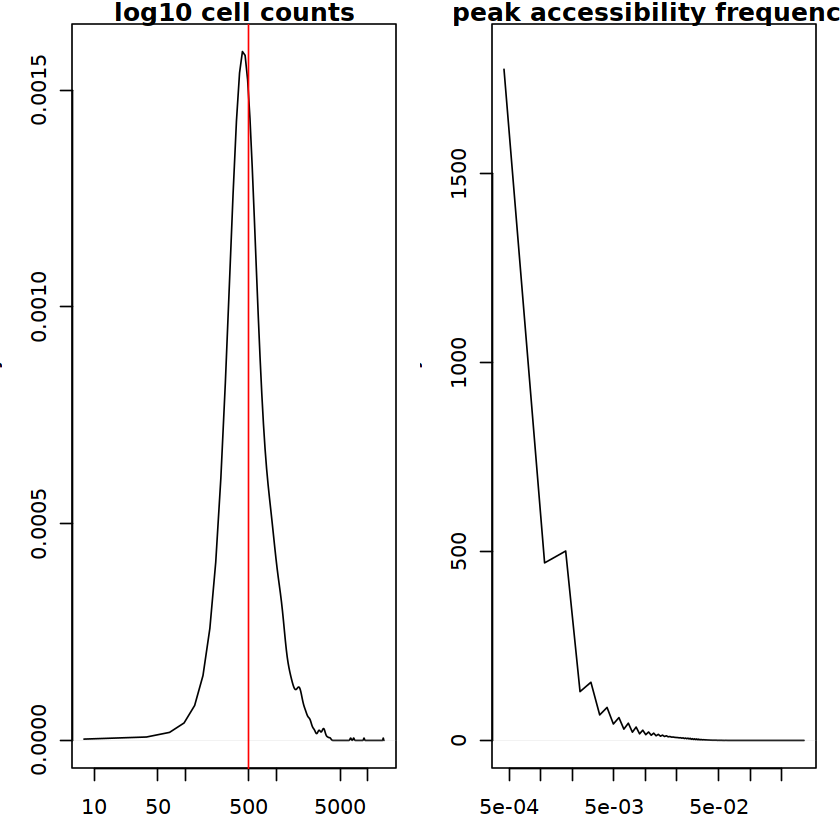

In [16]:
soc.obj <- passing_cells

# get per cell feature counts --------------------------------------------
cell.counts <- Matrix::colSums(passing_cells$counts)  # count number of features with Tn5 insertions per cell
cell.counts.z <- as.numeric(scale(cell.counts)) # convert features counts into Z-scores
cell.counts.threshold <- max(c(cell.counts[cell.counts.z < -1], 100)) # minimum feature counts (greater of 1 std or 1000)

print("Generating Graphs")
# estimate log10 number of accessible regions per cell
cell.counts <- Matrix::colSums(soc.obj$counts)

# estimate peak accessibility frequency across cells
site.freq <- Matrix::rowMeans(soc.obj$counts)
layout(matrix(c(1:2), ncol=2))
par(mar=c(3,3,1,1))
plot(density(cell.counts), main="log10 cell counts", log="x")
abline(v=500, col="red")
plot(density(site.freq), main="peak accessibility frequency", log="x")

In [17]:
# clean sparse counts matrix ---------------------------------------------
soc.obj <- cleanData(soc.obj, 
                     min.c=cell.counts.threshold,  # minimum number of accessible features per cell
                     min.t=0.01,  # minimum feature frequency across cells
                     max.t=0.001, # maximum feature frequency across cells
                     verbose=T)

# normalize with TFIDF ---------------------------------------------------
soc.obj <- tfidf(soc.obj)

   * Input: cells = 757 | peaks = 448622

   * Filtered: cells = 746 | peaks = 23950



In [18]:
# project with NMF -------------------------------------------------------
soc.obj.reduce_dim <- reduceDims(soc.obj,
                      method="SVD", 
                      n.pcs=25, 
                      num.var=2000,
                      svd_slotName="SVD")


# reduce to 2-dimensions with UMAP ---------------------------------------
soc.obj.project_umap <- projectUMAP(soc.obj.reduce_dim, 
                       verbose=T,
                       k.near=25,
                       svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

10:24:11 UMAP embedding parameters a = 1.896 b = 0.8006

10:24:11 Read 746 rows and found 25 numeric columns

10:24:11 Using Annoy for neighbor search, n_neighbors = 25

10:24:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:24:12 Writing NN index file to temp file /tmp/RtmpMA1UdT/file8cc66969aec0

10:24:12 Searching Annoy index using 16 threads, search_k = 2500

10:24:12 Annoy recall = 82.04%

10:24:13 Commencing smooth kNN distance calibration using 16 threads

10:24:13 141 smooth knn distance failures

10:24:14 Initializing from normalized Laplacian + noise

10:24:14 Commencing optimization for 500 epochs, with 28784 positive edges

10:24:20 Optimization finished



In [19]:
# identify clusters using neighborhood graph -----------------------------
tfidf.obj.dob.filt.clusters <- callClusters(soc.obj.project_umap, 
                        res=1.8,
                        verbose=T,
                        svd_slotName= "SVD",
                        cleanCluster=F)
#plot cluster membership on UMAP embedding ------------------------------
#options(repr.plot.width=5, repr.plot.height=5)
# NMF
#pdf(paste0(out,".NMF.full.UMAP.clusters.pdf"), width=10, height=10)
#plotUMAP(tfidf.obj.dob.filt.clusters, cex=0.3)
#dev.off()



 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 746
Number of edges: 80199

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.0664
Number of communities: 145
Elapsed time: 2 seconds


141 singletons identified. 4 final clusters.

 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



In [20]:
cell_converted_trible_umap <- as_tibble(tfidf.obj.dob.filt.clusters$Clusters) 
umap_joined_doublet <- left_join(cell_converted_trible_umap, try_final, by = c("cellID"))

str(cell_converted_trible_umap)

tibble [746 × 10] (S3: tbl_df/tbl/data.frame)
 $ cellID         : chr [1:746] "BC:Z:ATCACGAGTTCCACTCGGTCCGCTTCCC-Mo17B73_P2_G031_10x.rep1" "BC:Z:ATCACGAGTTCCCAATTGTCCGCGATGA-Mo17B73_P2_G031_10x.rep1" "BC:Z:ATCACGATGTCATCGCGCAAAAGCGAGG-Mo17B73_P2_G031_10x.rep1" "BC:Z:ATCACGCTTGTATGGATACTGATGATGA-Mo17B73_P2_G031_10x.rep1" ...
 $ total          : num [1:746] 25997 17356 12189 11183 6598 ...
 $ tss            : num [1:746] 4629 6660 1900 1680 1039 ...
 $ acrs           : num [1:746] 19582 7921 11399 10798 6350 ...
 $ ptmt           : num [1:746] NA NA NA NA NA NA NA NA NA NA ...
 $ nSites         : num [1:746] 14910 9168 7057 6540 3883 ...
 $ log10nSites    : num [1:746] 4.17 3.96 3.85 3.82 3.59 ...
 $ umap1          : num [1:746] -5.88 -4.68 -5.64 -5.13 -4.75 ...
 $ umap2          : num [1:746] 0.487 0.482 0.355 0.248 0.97 ...
 $ LouvainClusters: Factor w/ 4 levels "1","2","3","4": 1 3 3 4 4 1 2 4 2 3 ...


In [21]:
options(repr.plot.width=10, repr.plot.height=8)
doublet_x_genotype_plot <- ggplot(umap_joined_doublet, aes(umap1, umap2, color = final_cell_assignment)) + 
    geom_point(size = .6, alpha = .8) + theme_minimal() + ggtitle("Assigned Genotypes")

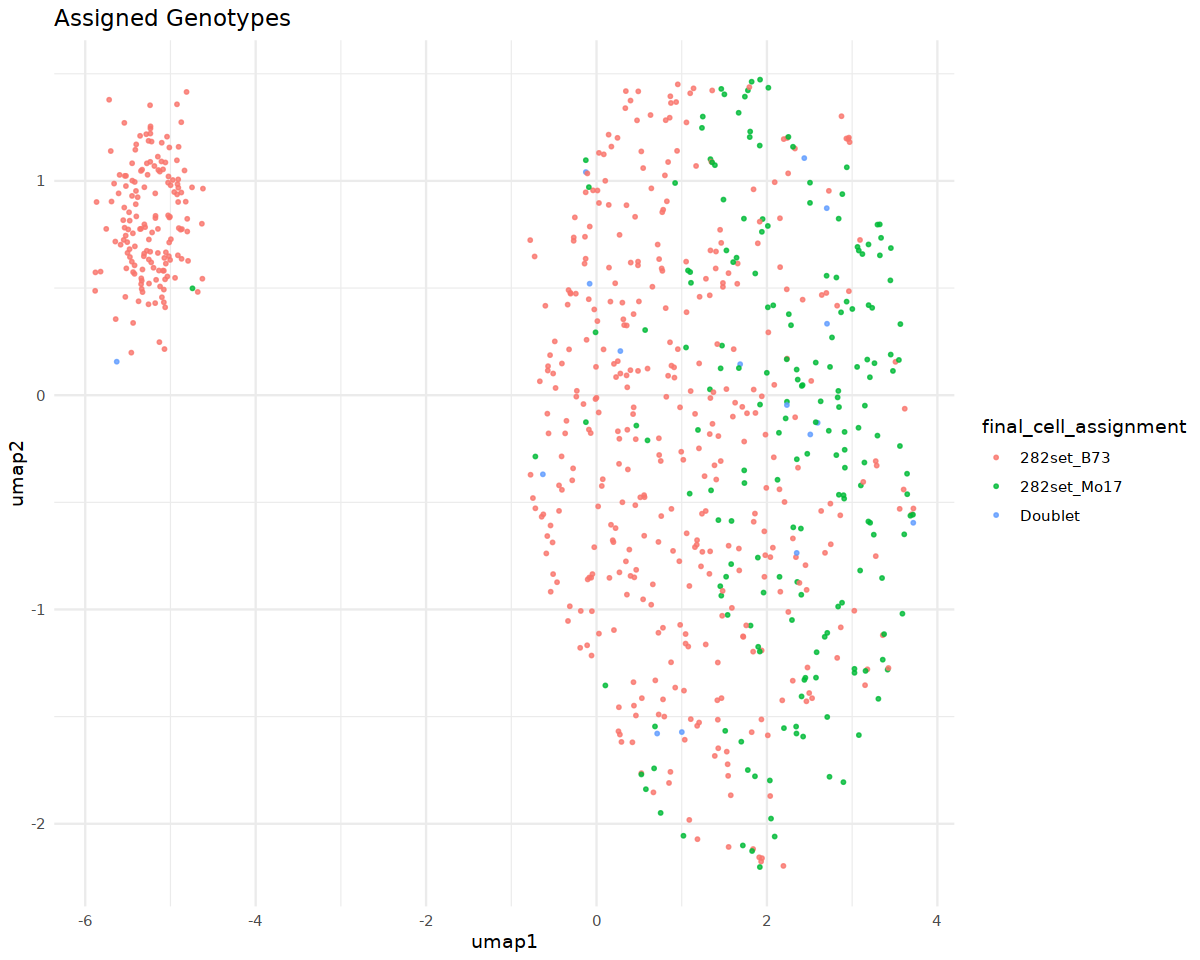

In [22]:
doublet_x_genotype_plot

In [23]:
ggsave("B73.Mo17.doublet_graph.umap.pdf", plot=doublet_x_genotype_plot, path="/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/doublet_estimation",width = 6, height = 5, units = "in", dpi = 500)
write_delim(umap_joined_doublet, file="/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/Zm_Mo17B73_P2_G031_10x.rep1.doublet_genotypes.txt", quote = "none", eol="\n", delim="\t")